# Project 2:  Holiday weather

by Gonzalo Gomez Millan, 23 November 2017, based on Rob Griffiths's version.

This is the project notebook for Week 2 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

The football world cup is an extraordinary event which run every four years. The football fans can enjoy watching surprising, and in some cases wonderful, matches. People who travel to the event country host experience an emotional rollercoaster each match of their national team, but when there is no match they go sightseeing. Even more, in that period of time, the host country is the place of fashion for tourism, benefiting its economy the arrival of tourists from around the world.

So in this project I am going to use the historic weather data from the Weather Underground for Moscow to try to predict two good weather weeks to take off as holiday next summer (When te football world cup occurs). Of course the weather in the summer of 2017 may be very different to 2014 but it should give me some indication of when would be a good time to take a summer break.


## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'Moscow' in the 'Location' input box and when the pop up menu comes up with the option 'Moscow, Russia' select it and then click on 'Submit'. 

When the next page opens with Moscow Vnukovo data, click on the 'Custom' tab and select the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed further down the page. 

The date column heading will be the timezone, e.g. 'GMT' (Greenwich Mean Time) for London, or the time offset, e.g. '-02'. It may even change throughout the year. For example, Delhi (aiport code DEL) is '+0430' from March to August and '+0330' in the other months.

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.

Weather Underground has changed in the past the way it provides data and may do so again in the future. 
I have therefore collated the whole 2014 data in the provided 'Moscow_SVO_2014.csv' file. 

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [3]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
moscow = read_csv('Moscow_SVO_2014.csv', skipinitialspace=True)

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [4]:
moscow = moscow.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [5]:
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].str.rstrip('<br />')

and change the values in the `'WindDirDegrees'` column to `float64`:

In [6]:
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [8]:
moscow['Date'] = to_datetime(moscow['Date'])

We also need to change the index from the default to the `datetime64` values in the `'Date'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [9]:
moscow.index = moscow['Date']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm interested in the northern hemisphere (Russia is there), I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [10]:
summer = moscow.ix[datetime(2014,6,1) : datetime(2014,8,31)]

I now look for the days with warm temperatures.

In [11]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-30,2014-07-30,32,26,19,16,13,11,69,48,29,...,10,9,5,29,11,40,0,6,Rain,236
2014-08-02,2014-08-02,33,26,18,20,16,13,94,65,31,...,10,10,9,47,5,68,0,6,Rain-Thunderstorm,35


Summer 2014 in Moscow had hot days. Now, I want to look for variability of temperature.

In [20]:
maxtemp = summer['Mean TemperatureC'].max()
maxtemp

26

In [21]:
mintemp = summer['Mean TemperatureC'].min()
mintemp

9

In [23]:
rangetemp = maxtemp - mintemp
rangetemp

17

The range of temperature is almost twice the minimum and there are two days with temperatures over 25 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [24]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

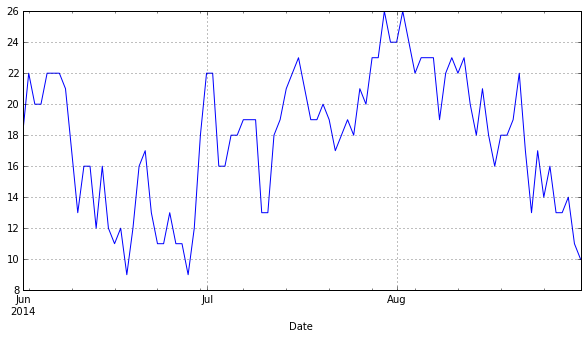

In [25]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Well looking at the graph the second half of July looks good for mean temperatures over 20 degrees C so let's also put precipitation and mean humidity on the graph too:

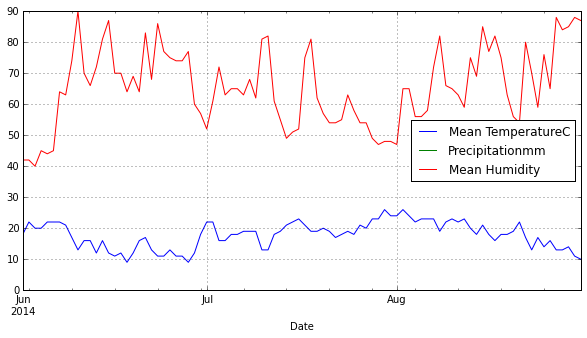

In [27]:
summer[['Mean TemperatureC', 'Precipitationmm', 'Mean Humidity']].plot(grid=True, figsize=(10,5))

The second half of July is still looking good, without raining and with a low mean humidity. Let's have a closer look by just plotting mean temperature, precipitation and mean humidity for July.

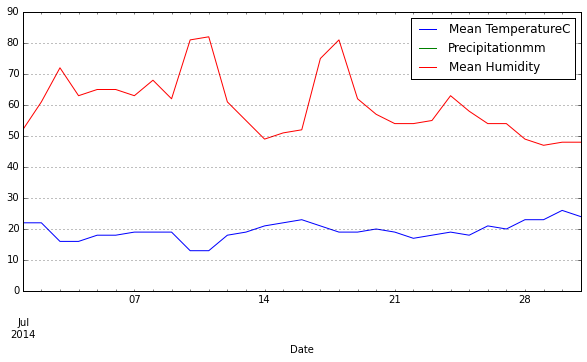

In [31]:
july = summer.ix[datetime(2014,7,1) : datetime(2014,7,31)]
july[['Mean TemperatureC', 'Precipitationmm', 'Mean Humidity']].plot(grid=True, figsize=(10,5))

In [32]:
july['Mean TemperatureC'].mean()

19.516129032258064

Yes, second half of July looks pretty good, warm temperature, 19,51 Celsius degrees average, no raining, just three days that have high humidity.

## Conclusions

The graphs have shown the volatility of a Russian summer, but a couple of weeks were found when the weather was so good in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years.